**Business Understanding:**



*   Tujuan: Membantu perusahaan pelayaran atau pihak terkait memahami faktor-faktor yang mempengaruhi keselamatan penumpang, serta memprediksi kemungkinan selamatnya penumpang berdasarkan karakteristik tertentu.

*   Manfaat: Memberikan insight untuk perbaikan sistem keselamatan di masa depan. Dapat digunakan untuk pelatihan model prediksi pada kasus serupa di industri transportasi.

Output Model: Prediksi (0 = Tidak Selamat, 1 = Selamat) untuk setiap penumpang berdasarkan fitur input.



Selanjutnya, kita akan membangun model neural network dengan 2 hidden layer menggunakan data ini.

### Menghubungkan Collab dengan Google Drive

In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum13/"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Pemanggilan Dataset di drive

### Loading Dataset

In [ ]:
df = pd.read_csv(path + 'data/titanic_data.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']

# Drop non-numeric and identifier columns
x = x.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Convert 'Sex' and 'Embarked' to numerical before dropping
x['Sex'] = x['Sex'].replace({'male': 0, 'female': 1})
x['Embarked'] = x['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

# Handle missing values in 'Age' by imputing with the mean (without inplace=True)
x['Age'] = x['Age'].fillna(x['Age'].mean())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/tmp/ipython-input-1972395398.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['Sex'] = x['Sex'].replace({'male': 0, 'female': 1})
/tmp/ipython-input-1972395398.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['Embarked'] = x['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.5197 - loss: nan - val_accuracy: 0.6503 - val_loss: nan
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6162 - loss: nan - val_accuracy: 0.6503 - val_loss: nan
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6081 - loss: nan - val_accuracy: 0.6503 - val_loss: nan
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6034 - loss: nan - val_accuracy: 0.6503 - val_loss: nan
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6375 - loss: nan - val_accuracy: 0.6503 - val_loss: nan
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6095 - loss: nan - val_accuracy: 0.6503 - val_loss: nan
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6074 - loss: nan - val_accuracy: 0.6503 - val_loss: nan
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6349 - loss: nan - val_accuracy: 0.6503 - val_loss: nan
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {loss:.2f}')
print(f'Test Accuracy: {accuracy:.2f}')

Test Loss: nan
Test Accuracy: 0.59


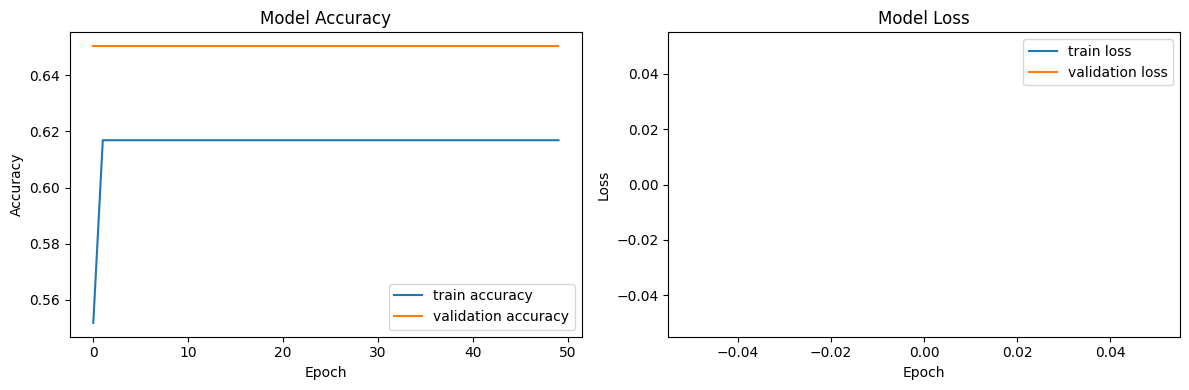

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# visualisasi akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# visualisasi loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()